In [21]:
#Unet
#import pckgs
import cv2
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re

import os
from natsort import natsorted
from imutils.src import imfunctions
import glob
from pathlib import Path
import shutil
from zim01_imaging_functions import *

In [10]:
input_filepath='/scratch/zimmer/DanielM/2021-09-06bag_zim06/btiffs/avi/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff.btf'
output_filepath='/scratch/zimmer/DanielM/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff_binary.btf'
median_blur=3
lt=140
ht=255
contour_size=1500
tolerance=0.5
area_to_fill=100
imfunctions.make_contour_based_binary(input_filepath, output_filepath, median_blur, lt, ht, contour_size, tolerance, area_to_fill)

In [18]:
input_filepath='/scratch/zimmer/DanielM/2021-09-06bag_zim06/btiffs/avi/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff.btf'
output_filepath='/scratch/zimmer/DanielM/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff_binary.btf'
median_blur=5
lt=140
ht=255
with tiff.TiffWriter(output_filepath, bigtiff=True) as tif_writer:
    with tiff.TiffFile(input_filepath) as tif:
        for i, page in enumerate(tif.pages):
            #loads the first frame and inverts it
            img=page.asarray()
            #median Blur
            if median_blur!=0:
                img=cv2.medianBlur(img,median_blur)

            #apply threshold
            ret, new_img = cv2.threshold(img,lt,ht,cv2.THRESH_BINARY)
            tif_writer.save(new_img,contiguous=True)

/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/daniel.mitic/.conda/envs/openCV/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/groups/zimmer/Daniel_Mitic/code/imutils/imutils/dev/zim01_imaging_functions.py:48: RuntimeWarning: divide by zero encountered in true_divide
  axes[2].plot(gcamp_signal/rfp_signal)


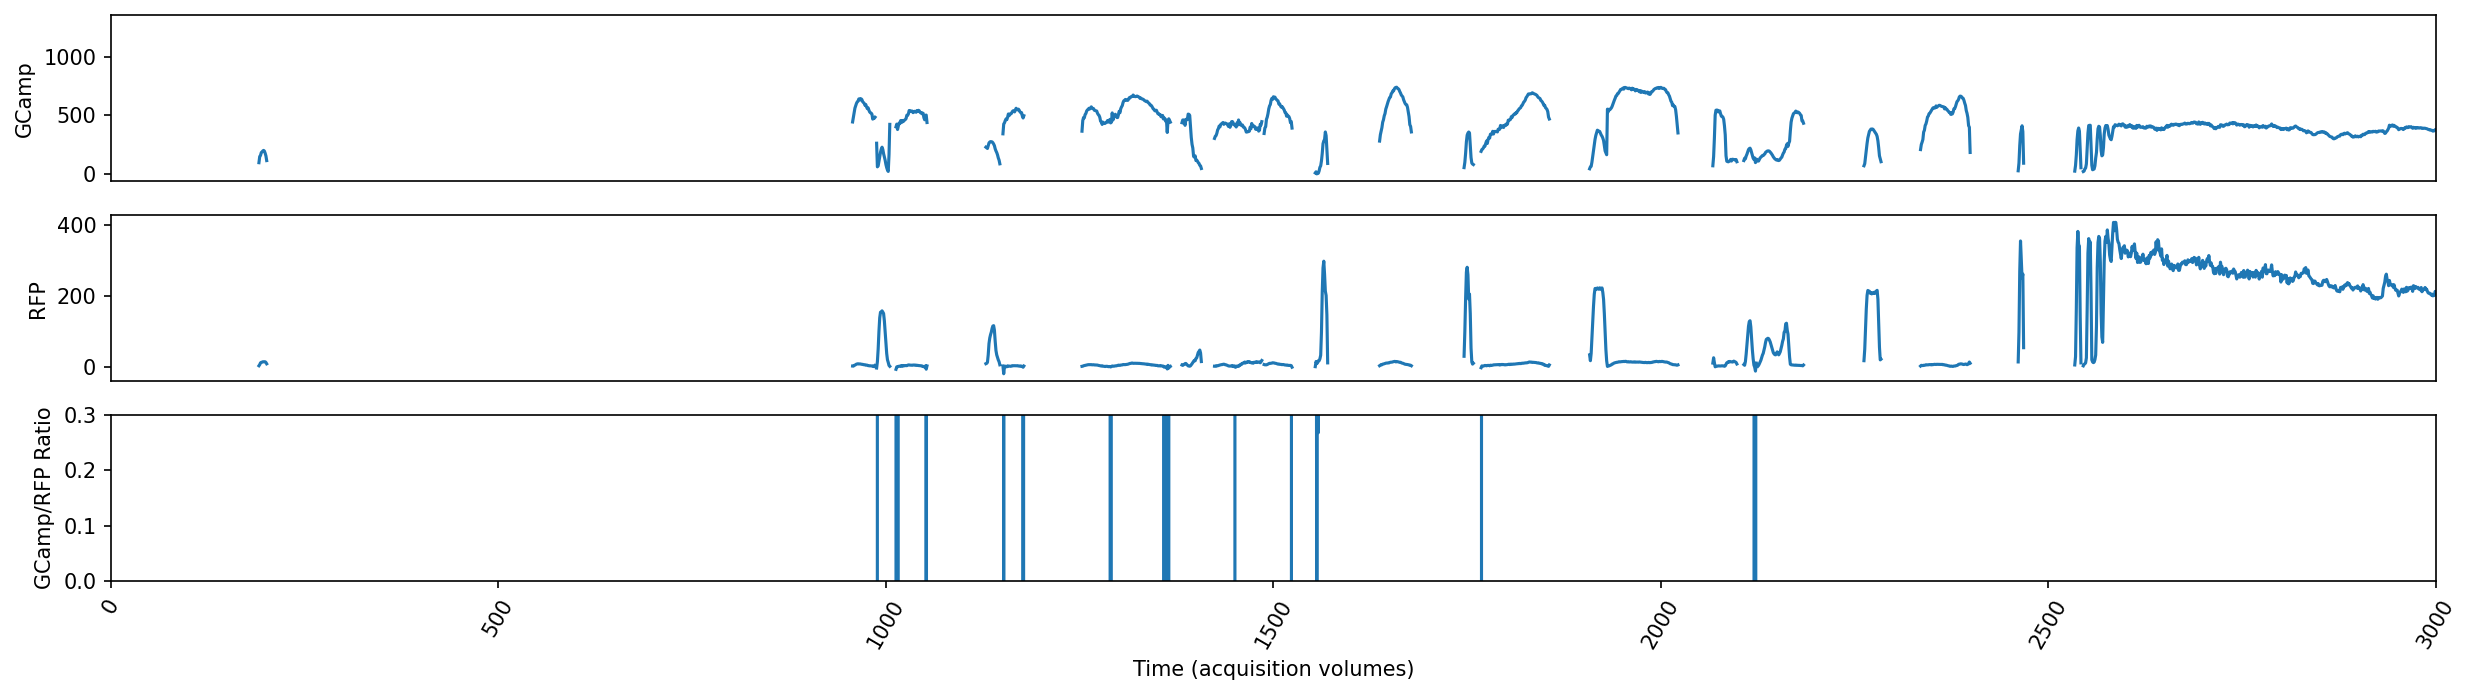

In [22]:
#function to calculate and plot the signal
rfp_mask_filepath='/scratch/zimmer/DanielM/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff_binary.btf'
gcamp_filepath='/scratch/zimmer/DanielM/2021-09-06bag_zim06/btiffs/avi/2021-09-06_18-10-32_worm3_on-channel-1-Andor9046bigtiff.btf'
rfp_filepath='/scratch/zimmer/DanielM/2021-09-06bag_zim06/btiffs/avi/2021-09-06_18-10-32_worm3_on-channel-0-Andor3972bigtiff.btf'
background=140
start_volume=0
end_volume=3000
gcamp_signal, rfp_signal=calculate_signal(rfp_filepath,rfp_mask_filepath,gcamp_filepath,background)
plot_gcamp_rfp_ratio(gcamp_signal,rfp_signal,start_volume,end_volume)

In [15]:
len(gcamp_signal)

30001